# U-FRET

In [1]:
url = "https://www.ufret.jp/song.php?data=5012"

## Scraping

#### `get_ufret_chords`

In [2]:
from guitar.ufret import get_ufret_chords

In [3]:
title, key, data = get_ufret_chords(url, key="0")

Accessing to https://www.ufret.jp/song.php?data=5012...
Set key to 0...


  0%|          | 0/72 [00:00<?, ?it/s]

title: 欲望に満ちた青年団 / ONE OK ROCK


100%|██████████| 72/72 [00:34<00:00,  2.08it/s]


#### `get_ufret_chords_with_driver`

If you want to use your specified `driver`, use `get_ufret_chords_with_driver` function.

```python
from guitar.ufret import get_ufret_chords_with_driver
from selenium import webdriver

driver = webdriver.Chrome()
get_ufret_chords_with_driver(driver, url, key="0", to_json=True)
driver.quit()
```

## Export ChordBook

In [4]:
import re
from guitar.utils import find_key_major_scale
from guitar import Guitar

In [5]:
notes = {e for val in data.values() for e in val.get("chord")}

In [6]:
notes = list(set([re.sub(r"([A-G]#?m?).*", r"\1", note) for note in notes if note!=""]))

In [7]:
print(notes)

['D#m', 'A#m', 'C#m', 'D#', 'B', 'G#m', 'Fm', 'E', 'F#', 'C#', 'F#m']


TODO: We could not understand the key from above notes

In [8]:
guitar = Guitar(key="B", scale="major", dark_mode=False, name="欲望に満ちた少年団(ONE OK ROCK)")

/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.notes}")
/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.notes}")
/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.notes}")
/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.notes}")
/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.notes}")
/src/guitar/main.py:148: UserWarning: F is not included in the ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']
  warnings.warn(f"{chode} is not included in the {self.n

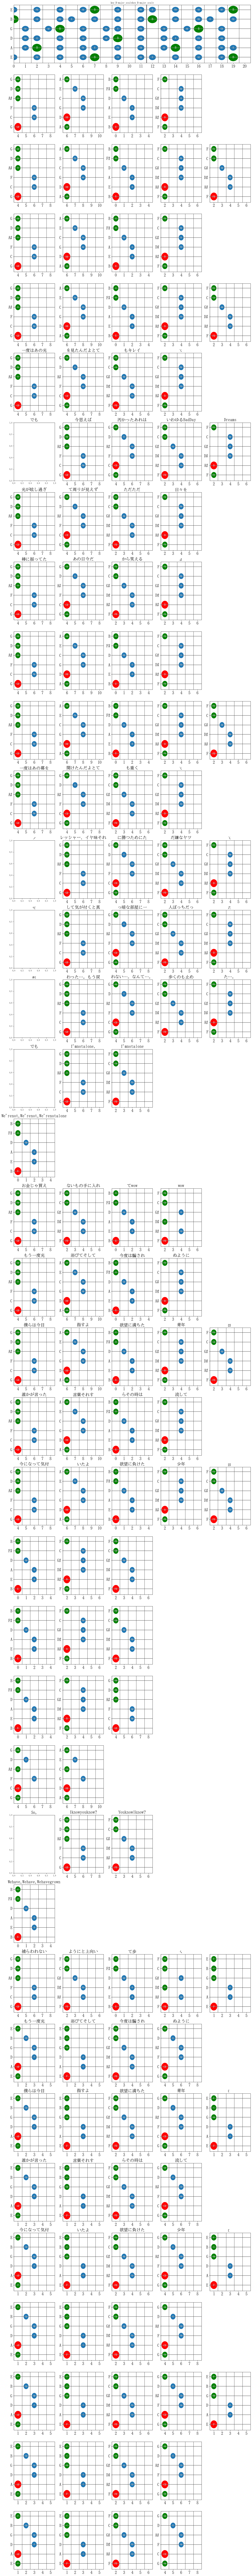

In [9]:
guitar.create_chord_book(data)